<a href="https://colab.research.google.com/github/Syed-MuhammadTaha/IrisFlower/blob/main/IrisFlower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from pandas import read_csv
from pandas import get_dummies
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = read_csv(url, names=names)

In [4]:
df.shape

(150, 5)

In [5]:
df.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.groupby('class').describe()

sepal-length                                              \
                       count   mean       std  min    25%  50%  75%  max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal-width         ... petal-length      petal-width         \
                      count   mean  ...          75%  max       count   mean   
class                               ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
class                                               
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

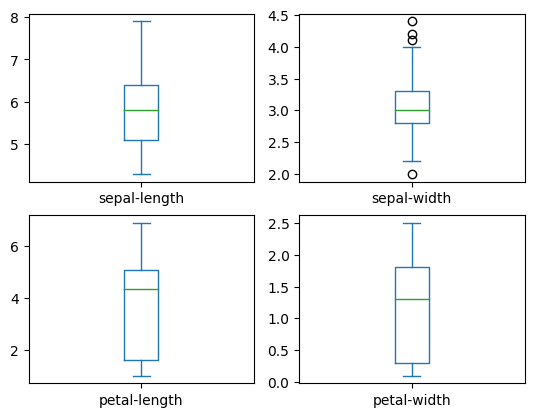

In [8]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

array([[<Axes: title={'center': 'petal-length'}, xlabel='[class]'>,
        <Axes: title={'center': 'petal-width'}, xlabel='[class]'>],
       [<Axes: title={'center': 'sepal-length'}, xlabel='[class]'>,
        <Axes: title={'center': 'sepal-width'}, xlabel='[class]'>]],
      dtype=object)

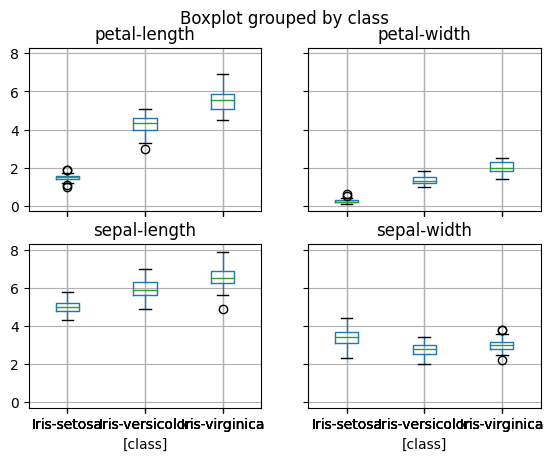

In [9]:
df.boxplot(by="class")

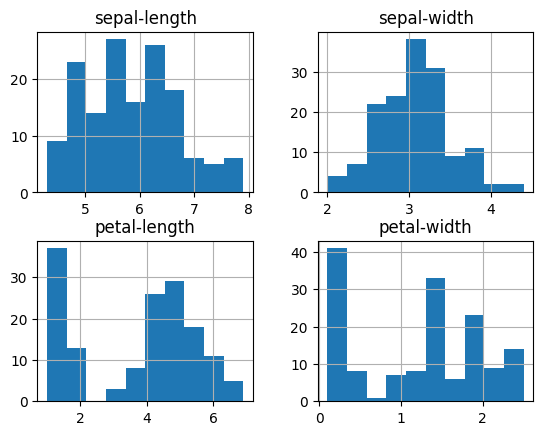

In [10]:
df.hist()
plt.show()

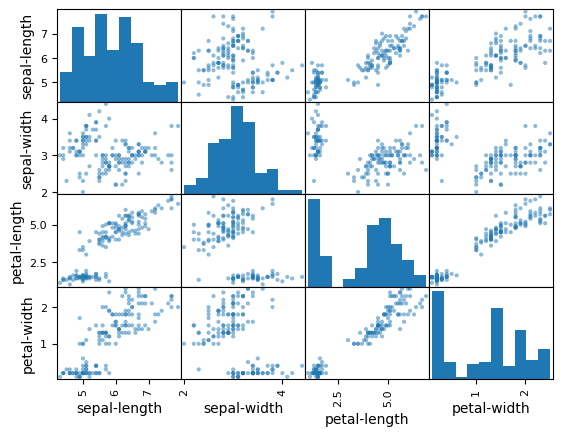

In [11]:
scatter_matrix(df)
plt.show()

In [12]:
one_hot_encoded = get_dummies(df, columns = ['class'])

In [13]:
one_hot_encoded.corr()

,sepal-length,sepal-width,petal-length,petal-width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
sepal-length,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
sepal-width,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
petal-length,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
petal-width,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
class_Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
class_Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
class_Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


<Axes: >

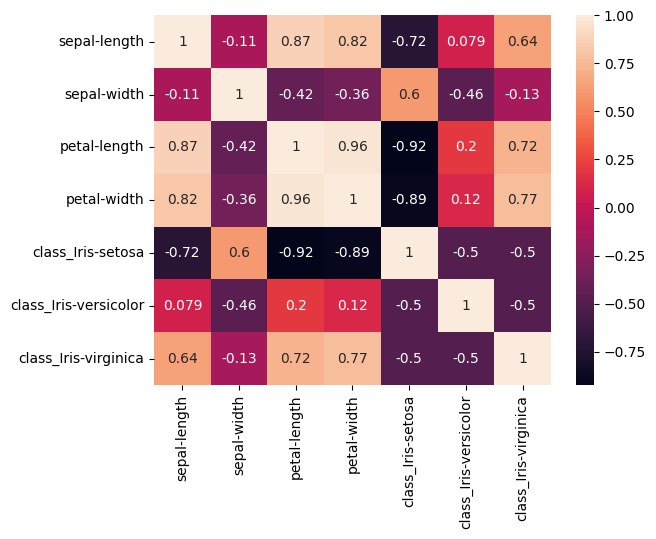

In [14]:
sns.heatmap(one_hot_encoded.corr(), annot=True)

In [15]:
X = df.drop('class', axis=1)
y = df['class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [18]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.040825)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


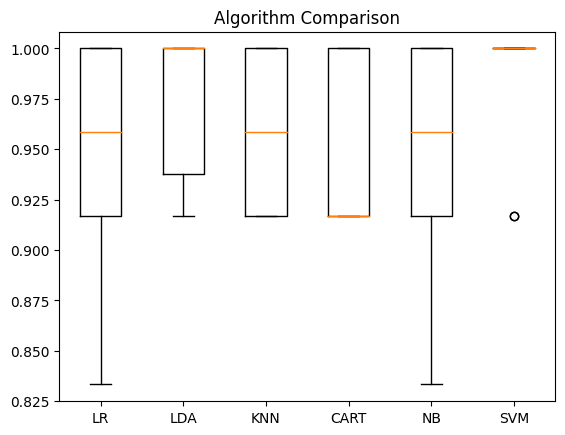

In [21]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [25]:
svm = SVC(gamma="auto")
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(accuracy_score(y_test, predictions))


0.9666666666666667


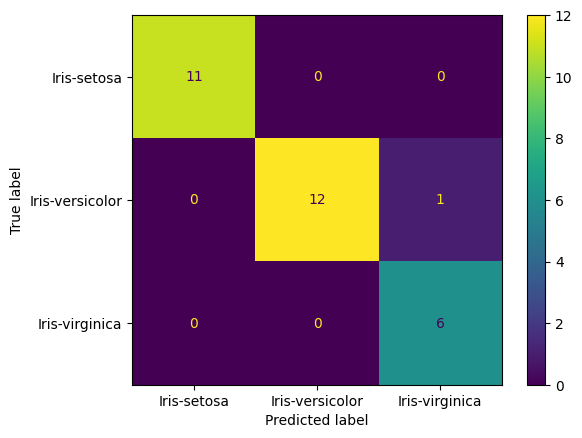

In [28]:
confusion_matrix = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = svm.classes_)
cm_display.plot()
plt.show()

In [29]:
classification_report = classification_report(y_test, predictions)
print(classification_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

